In [2]:
%matplotlib inline

## [Ordinary Least Squares (OLS)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Minimizes the residual sum of squares between the observed and predicted targets. 
- Loss function: $\min_{w} || X w - y||_2^2$)
- Complexity: $O(n_{\text{samples}} n_{\text{features}}^2)$

In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(
    [[0, 0], [1, 1], [2, 2]], 
    [ 0,      1,      2    ])

print(reg.coef_)

[0.5 0.5]


diabetes_X,y: 		 (442, 1) (442,)
diabetes_X_train/test: 	 (422, 1) (20, 1)
diabetes_y_train/test: 	 (422,) (20,)
diabetes_y_pred: 	 (20,)
Coeffs: 		 [938.23786125]
MSE: 			 2548.1
CoD: 			 0.5


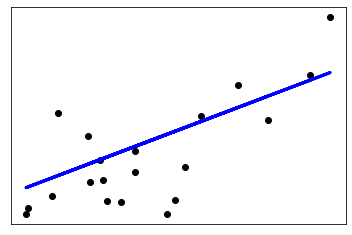

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load diabetes dataset, use one feature, split into training/test subsets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X             = diabetes_X[:, np.newaxis, 2]
diabetes_X_train       = diabetes_X[:-20]
diabetes_X_test        = diabetes_X[-20:]
diabetes_y_train       = diabetes_y[:-20]
diabetes_y_test        = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)

print('diabetes_X,y: \t\t',diabetes_X.shape, diabetes_y.shape)
print('diabetes_X_train/test: \t', diabetes_X_train.shape, diabetes_X_test.shape)
print('diabetes_y_train/test: \t', diabetes_y_train.shape, diabetes_y_test.shape)
print('diabetes_y_pred: \t',diabetes_y_pred.shape)
print('Coeffs: \t\t', regr.coef_)
print('MSE: \t\t\t %.1f'  % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('CoD: \t\t\t %.1f' % r2_score(          diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(   diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
- imposes a penalty on coefficient sizes to address collinearity problems.
- cost function: $\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$
- complexity parameter: $\alpha \geq 0$ - controls shrinkage. (larger $\alpha$ = greater shrinkage = more robustness to collinearity.)

In [29]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

print(reg.coef_, reg.intercept_)

[0.34545455 0.34545455] 0.13636363636363638


#### example: print coefficients as f(regularization)
- shows effect of collinarity on estimator's coefficients.
- each color = distinct feature of coefficient vector, and displayed as function of regularization.
- illustrates the value of Ridge regression on highly ill-conditioned matrices.
- when $/alpha/$ is large, regularization dominates the loss function - coefficents trend towards zero.
- when $/alpha/$ approaches zero, solution trends towards OLS (coefficients have big oscillations).

In [30]:
# X is the 10x10 Hilbert matrix
X        = 1./(np.arange(1, 11) 
               + np.arange(0, 10)[:, np.newaxis])
y        = np.ones(10)
n_alphas = 200
alphas   = np.logspace(-10, -2, n_alphas)
coefs    = []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

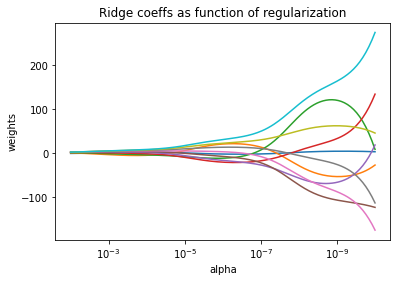

In [31]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coeffs as function of regularization')
plt.axis('tight')
plt.show()

## [Ridge Classification](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier)
- Converts targets to ```{-1,1}```, then treats the problem as a regression.
- Predicted classes correspond to the regressor's predicted sign.
- Also works for multiclass classification (as a multi-output regression) - predicted class corresponds to highest-value outputs.
- Why use least squares, instead of logistic or hinge, as a loss function?
    - 1) they typically return similar cross-validation scores (accuracy, precision/recall)
    - 2) LS allows use to use different (faster) numerical solvers.
    - 3) Especially so for high numbers of classes because the main computation (the projection function $(X^T X)^{-1} X^T$ needs to happen only once.)
- Sometimes called a [Least Squares SVM](https://en.wikipedia.org/wiki/Least-squares_support-vector_machine) with a linear kernel.
- Same complexity as OLS.
- [linear algebra solver options](linear-algebra-solver-options.md) (see API)

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier

X, y = load_breast_cancer(return_X_y=True)
clf  = RidgeClassifier().fit(X, y)
print(X.shape,y.shape, clf.score(X, y))

(569, 30) (569,) 0.9595782073813708


## [Ridge regression via built-in cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV)
- Defaults to a generalized (Leave-One-Out) form of CV.
- You can use [Grid Search CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) instead by including a fold value, eg ```cv=10```.

In [42]:
import numpy as np
from sklearn import linear_model

X = [[0, 0], [0, 0], [1, 1]]
y = [ 0,      .1,     1]

reg = linear_model.RidgeCV(alphas = np.logspace(-6, 6, 13))
reg.fit(X,y)

print(alphas.shape, reg.alpha_)
print(alphas.max(), alphas.min())

(200,) 0.01
0.01 1e-10


## [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
- Estimates **sparse coefficients**.
- Especially useful for **compressed sensing**.
- Loss function: $\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$
    - where $\alpha$ is a constant,
    - $||w||_1$ is the l1 norm of the cofficients.
- Uses **coordinate descent** to fit the coefficients.
- Uses [lasso path](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html#sklearn.linear_model.lasso_path) as a internal function to compute the cofficients.

In [47]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

print(clf.coef_, clf.intercept_)

[0.85 0.  ] 0.15000000000000002


## Example: Tomography reconstruction (Lasso, Ridge)
- Task: reconstruct an image from a set of parallel projections from different angles.
- Without any knowledge, the #projections required is ~L (image size in pixels)
- For simplicity we use a sparse image with non-zero pixels on the object boundaries.
- Reconstruction with L1 penalty returns results with zero error (all pixels successfully labeled as 0 or 1), even with added noise.
- Reconstruction with L2 penalty (Ridge) returns many pixel label errors, which appear in the image.

In [48]:
import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [52]:
def _weights(x, dx=1, orig=0):
    x       = np.ravel(x)
    floor_x = np.floor((x - orig) / dx).astype(np.int64)
    alpha   = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha)),

In [53]:
def _generate_center_coordinates(l_x):
    X, Y   = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.
    X     += 0.5 - center
    Y     += 0.5 - center
    return X, Y

In [54]:
# build tomography design matrix
# l_x (int): linear size of image array
# n_dir (int): #angles at which projections are acquired
# p (sparse matrix of shape (n_dir l_x, l_x**2))
#

def build_projection_operator(l_x, n_dir):

    X, Y   = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x ** 2)
    data_unravel_indices = np.hstack((data_unravel_indices,
                                      data_unravel_indices))
    
    for i, angle in enumerate(angles):
        Xrot         = np.cos(angle) * X - np.sin(angle) * Y
        inds, w      = _weights(Xrot, dx=1, orig=X.min())
        mask         = np.logical_and(inds >= 0, inds < l_x)
        weights     += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds   += list(data_unravel_indices[mask])

    proj_operator = sparse.coo_matrix(
        (weights, (camera_inds, data_inds)))
    return proj_operator

In [55]:
def generate_synthetic_data():
    rs         = np.random.RandomState(0)
    n_pts      = 36
    x, y       = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2.) ** 2 + (y - l / 2.) ** 2 < (l / 2.) ** 2
    mask       = np.zeros((l, l))
    points     = l * rs.rand(2, n_pts)

    mask[
        (points[0]).astype(np.int), 
        (points[1]).astype(np.int)] = 1
    
    mask = ndimage.gaussian_filter(
        mask, 
        sigma = l/n_pts)
    res  = np.logical_and(
        mask > mask.mean(), 
        mask_outer)
    return np.logical_xor(res, ndimage.binary_erosion(res))

In [56]:
# Generate synthetic images & projections
l             = 128
proj_operator = build_projection_operator(l, l // 7)
data          = generate_synthetic_data()
proj          = proj_operator * data.ravel()[:, np.newaxis]
proj         += 0.15 * np.random.randn(*proj.shape)

In [57]:
# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

In [58]:
# Reconstruction with L1 (Lasso) penalty
# alpha found via cross validation
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

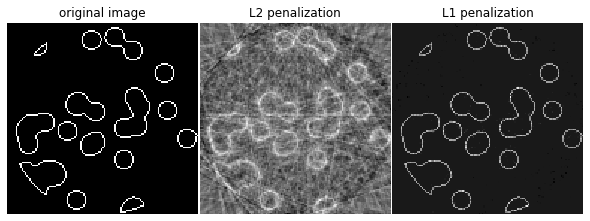

In [59]:
plt.figure(figsize=(8, 3.3))

plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.title('original image')

plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L2 penalization')
plt.axis('off')

plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation='nearest')
plt.title('L1 penalization')
plt.axis('off')

plt.subplots_adjust(
    hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)

plt.show()

## [Lasso & Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection)
- Because Lasso returns a sparse model, it can be used for feature selection.

## [Multiple-Regression Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskLasso.html#sklearn.linear_model.MultiTaskLasso)
- Estimates sparse coefficients, simulataneously, for multiple regression problems (tasks).
- **y**: a 2D array of (#samples, #tasks). Each task must have the same #features.
- It uses a mixed L1L2 norm for regularization.
- The loss function: $\min_{w} { \frac{1}{2n_{\text{samples}}} ||X W - Y||_{\text{Fro}} ^ 2 + \alpha ||W||_{21}}$
- $\text{Fro}$ is the Frobenius norm: $||A||_{\text{Fro}} = \sqrt{\sum_{ij} a_{ij}^2}$
- The L1L2 norm: $||A||_{2 1} = \sum_i \sqrt{\sum_j a_{ij}^2}.$
- Uses coordinate descent to fit the coefficients.

- Example: Simulate multiple time series functions. Multi-task Lasso imposes features selected at one time point are selected for all time points. This makes Lasso-based feature selection more stable.

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import MultiTaskLasso, Lasso

In [61]:
# Generate 2D coefficients with sine waves & random frequency & phase

rng = np.random.RandomState(42)

n_samples, n_features, n_tasks, n_relevant_features = 100, 30, 40, 5

coef  = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)

for k in range(n_relevant_features):
    coef[:, k] = np.sin(
        (1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

In [65]:
coef_lasso_ = np.array(
    [Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])

coef_multi_task_lasso_ = MultiTaskLasso(
    alpha=1.).fit(X, Y).coef_

Text(0.5, 0.98, 'Coefficient non-zero location')

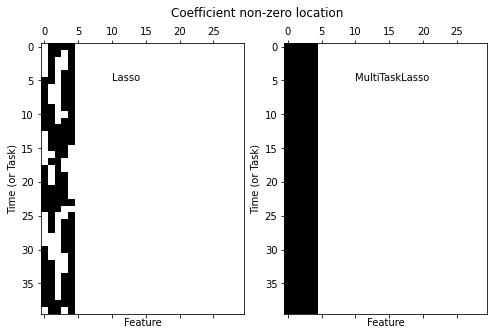

In [71]:
# sparsity pattern of a 2D array

fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')

plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')

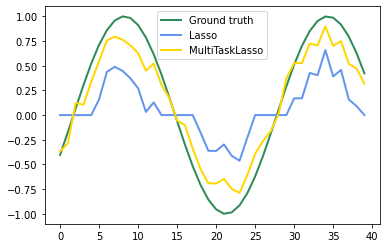

In [72]:
feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(
    coef[:, feature_to_plot], 
    color='seagreen', 
    linewidth=lw,
    label='Ground truth')

plt.plot(
    coef_lasso_[:, feature_to_plot], 
    color='cornflowerblue', 
    linewidth=lw,
    label='Lasso')

plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot], 
    color='gold', 
    linewidth=lw,
    label='MultiTaskLasso')

plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()

## [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)
- Trained with both $\ell_1$ and $\ell_2$-norm regularization.
- Good for sparse model training (like Lasso), while maintaining regularization properties of Ridge.
- The combination of $\ell_1$ and $\ell_2\$ is controlled with ```l1_ratio```.
- Particularly useful when multiple features are correlated to each other. (Lasso is likely to randomly pick one; Elastic-net is likely to pick both.)
- alpha and l1_ratio can be auto-set using [Elastic-Net with CrossValidation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV)

Example: Lasso vs Elastic-net, artificial sparse signal with noise. Coefficients are compared to ground truth.

In [73]:
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx       = np.arange(n_features)
coef      = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y         = np.dot(X, coef)
y        += 0.01 * np.random.normal(size=n_samples) #noise

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test,  y_test  = X[n_samples // 2:], y[n_samples // 2:]

In [74]:
from sklearn.linear_model import Lasso

alpha          = 0.1
lasso          = Lasso(alpha=alpha)
y_pred_lasso   = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1)
r^2 on test data : 0.658064


In [75]:
from sklearn.linear_model import ElasticNet

enet          = ElasticNet(alpha=alpha, l1_ratio=0.7)
y_pred_enet   = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)

print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.642515


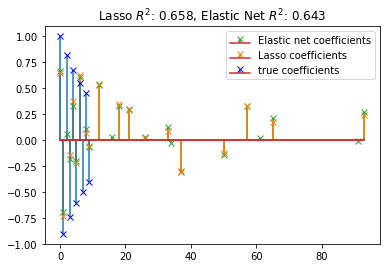

In [76]:
# build a stem plot
m, s, _ = plt.stem(
    np.where(enet.coef_)[0], 
    enet.coef_[enet.coef_ != 0],
    markerfmt='x', 
    label='Elastic net coefficients',
    use_line_collection=True)

plt.setp(
    [m, s], 
    color="#2ca02c")

m, s, _ = plt.stem(
    np.where(lasso.coef_)[0], 
    lasso.coef_[lasso.coef_ != 0],
    markerfmt='x', 
    label='Lasso coefficients',
    use_line_collection=True)

plt.setp(
    [m, s], 
    color='#ff7f0e')

plt.stem(
    np.where(coef)[0], 
    coef[coef != 0], 
    label='true coefficients',
    markerfmt='bx', 
    use_line_collection=True)

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

## [Elastic-Net for Multiple Tasks](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNet.html#sklearn.linear_model.MultiTaskElasticNet)
- Estimates sparse coefficients for multiple regressions.
- Y is a 2D array of ```[n_samples, n_tasks]```.
- The training is regularized using a mixed $\ell_1\ell_2$ norm and $\ell_2$ norm.
- Loss function: $\min_{W} { \frac{1}{2n_{\text{samples}}} ||X W - Y||_{\text{Fro}}^2 + \alpha \rho ||W||_{2 1} +
\frac{\alpha(1-\rho)}{2} ||W||_{\text{Fro}}^2}$
- Uses coordinate descent as the fitting algorithm.
- ```alpha``` and ```l1_ratio``` can be auto-set via cross-validation using [MultiTaskElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNetCV.html#sklearn.linear_model.MultiTaskElasticNetCV)

In [77]:
from sklearn import linear_model

clf = linear_model.MultiTaskElasticNet(alpha=0.1)
clf.fit(
    [[0, 0], [1, 1], [2, 2]], 
    [[0, 0], [1, 1], [2, 2]])

print(clf.coef_, clf.intercept_)

[[0.45663524 0.45612256]
 [0.45663524 0.45612256]] [0.0872422 0.0872422]


## [LARS (Least Angle Regression)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html#sklearn.linear_model.Lars)
- Good option for high-dimensional data.
- Similar to forward stepwise regression. (Finds most correlated feature at each step. If there are multiple, equally correlated features, next step uses a direction equiangular between them.)
- Numerically efficient when n_features >> n_samples
- Same complexity as OLS
- Returns a full piecewise linear solution path - useful for cross-validation.
- (Overly?) sensitive to noise.

In [78]:
from sklearn import linear_model
reg = linear_model.Lars(n_nonzero_coefs=1)
reg.fit(
    [[-1, 1], [0, 0], [1, 1]], 
    [-1.1111,  0,     -1.1111])

print(reg.coef_)

[ 0.     -1.1111]


## [Lasso Lars](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars)
- Lasso model implemented with LARS algorithm.
- Instead of including features at each step, the coefficients are increased in a direction equiangular to each correlation with the residual.
- Returns a curve representing a solution for each value of the $\ell_1$ norm. The full path is stored in ```coef_path_``` with size (n_features, max_features+1). The first column is always zero.

In [82]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit([[0, 0, 0], [1, 2, 3]], 
        [0, 1])

print(reg.coef_)

[0.         0.         0.23905243]


Example: compute Lasso path vs regularization using the LARS algorithm on the diabetes dataset. Each color = different feature of the coefficient vector.

.

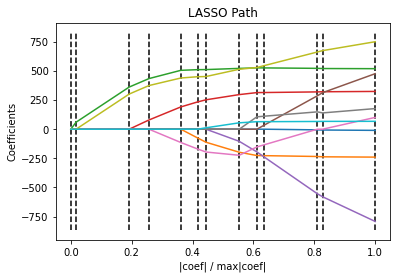

In [80]:
X, y = datasets.load_diabetes(return_X_y=True)

_, _, coefs = linear_model.lars_path(
    X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()